In [ ]:
!pip uninstall tensorflow
#!pip install tensorflow

In [ ]:
!pip install tensorflow

In [2]:
!pip install hyperas
!pip install hyperopt

In [10]:
from tensorflow import keras

AttributeError: module '_pywrap_tensorflow_internal' has no attribute 'TF_OK_swigconstant'

In [13]:
import tensorflow as tf

AttributeError: module '_pywrap_tensorflow_internal' has no attribute 'TF_OK_swigconstant'

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
pip uninstall hyperas

In [83]:
from hyperas import optim

Using TensorFlow backend.


ImportError: cannot import name 'transpose_shape' from 'keras.utils.generic_utils' (C:\Users\bedir\anaconda3\lib\site-packages\keras\utils\generic_utils.py)

In [17]:
%%capture
# install tensorflow 2.0 beta
!pip install -q tensorflow-gpu==2.0.0-beta0

# install GapCV
!pip install -q gapcv

# install hyperas
!pip install -q hyperas

In [44]:
import tensorflow.keras.utils

In [48]:
from tensorflow.keras.layers import Dense

In [54]:
from __future__ import print_function

from hyperopt import Trials, STATUS_OK, tpe
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from keras.utils import np_utils


In [56]:
from hyperas.distributions import uniform
from tensorflow.hyperas import uniform

ModuleNotFoundError: No module named 'tensorflow.hyperas'

In [10]:

from __future__ import print_function
import numpy as np

from hyperopt import Trials, STATUS_OK, tpe
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform

Using TensorFlow backend.


ImportError: cannot import name 'transpose_shape' from 'keras.utils.generic_utils' (C:\Users\bedir\anaconda3\lib\site-packages\keras\utils\generic_utils.py)

#### Fashion Mnıst dataset is consist fashion items as 70.000 grayscale image of 28*28 pixels each, with 10 classes.

Load fashion MNIST dataset: 

In [69]:
fashion_mnist= keras.datasets.fashion_mnist

In [70]:
fashion_mnist= keras.datasets.mnist

This data already splitted:

In [71]:
(X_train_full, y_train_full), ( X_test, y_test)= fashion_mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [72]:
X_train_full.shape,y_train_full.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

But there is no validation set. Let's create one: 

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42)

In [74]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

And since pixels intensities is between 0-255, we should scale these values by dividing 255 each value:

In [75]:
X_train= X_train/255
X_test= X_test/255
X_valid= X_valid/255

Labels information of this data:

Each training and test example is assigned to one of the following labels:

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

So let's give class name for each label:

In [76]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in y_train[0:5]:
    print(class_names[i])

Sandal
T-shirt/top
Trouser
Shirt
Trouser


Labels:

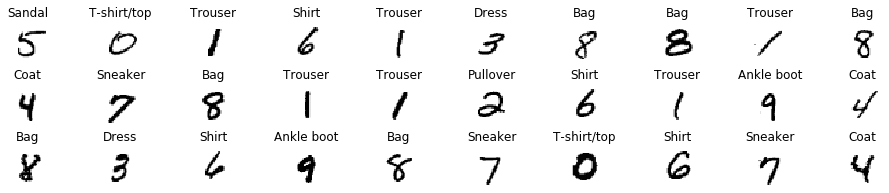

In [77]:
def display_images(X_values,y_targets,n_rows=4,n_cols=10):
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(n_cols * 1.6, n_rows * 1))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X_values[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_targets[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    plt.show()
display_images(X_train, y_train,3,10)

Lets build a simple neural network model for predict label.

In [78]:
X_train.shape[1:]

(28, 28)

Now build a basic model and observe accuracy. Than try to improve accuracy.

In [79]:
#### This section for tensorboard. Not really importand for now. (Important but not now.)
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [80]:
# Build and compile a basic model
def model_():
    
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(10, activation="softmax")#  If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid"
                                                    #  (i.e., logistic) activation function in the output layer instead of the "softmax"
                                                    #  activation function, and we would use the "binary_crossentropy" loss.      
    ])
       
            
    return model
model=model_()
model.compile(loss="sparse_categorical_crossentropy",  #  we use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class 
                                                       #  index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability
                                                       #  per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
                                                       #  to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. 
             optimizer="sgd",
             metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7690 - accuracy: 0.8068 - val_loss: 0.4190 - val_accuracy: 0.8817
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3708 - accuracy: 0.8971 - val_loss: 0.3310 - val_accuracy: 0.9080
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3164 - accuracy: 0.9107 - val_loss: 0.2970 - val_accuracy: 0.9159
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2860 - accuracy: 0.9188 - val_loss: 0.2728 - val_accuracy: 0.9222
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9254 - val_loss: 0.2543 - val_accuracy: 0.9277
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2449 - accuracy: 0.9307 - val_loss: 0.2400 - val_accuracy: 0.9326
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2300 - accuracy: 0.9353 - val_loss: 0.2282 - val_accuracy:

Take look to evaluation parameters improving 

In [13]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 9232), started 1 day, 8:15:32 ago. (Use '!kill 9232' to kill it.)

Yo can see how changed loss and accuracy values. Lets observe this change. 

Let's add a callback to earlystop. To do this, ve just can add **tf.keras.callbacks.EarlyStopping(patience=3)** Thiss code will stop training when validation loss not improve 3 time in a row. 

Normally, 3 is not good number for this. But in here, i try to understandable and traceable.


---

Now, let's measure basic model's accuracy:

In [14]:
def print_accuracy():
    print("Train     ", model.evaluate(X_train, y_train))
    print("Validation", model.evaluate(X_valid, y_valid))
    print("Test      ", model.evaluate(X_test, y_test))
print_accuracy()

1500/1500 [==============================] - 2s 1ms/step - loss: 0.2752 - accuracy: 0.9003
Train      [0.27524876594543457, 0.9002500176429749]
375/375 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8767
Validation [0.34680190682411194, 0.8766666650772095]
313/313 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8703
Test       [0.3683675229549408, 0.8702999949455261]


In [15]:
#model=model_()
#history = model.fit(X_train, y_train, epochs=30,
#                    validation_data=(X_valid, y_valid),
#                    callbacks=[tensorboard_cb,
#                              tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")]
#                   )

we got 0.86 accuracy. Not good at all. Lets try to improve. 

First, i will try just learning rate set and find the best. Than shile using this learning rate, i change hidden layer, n_neurons etc.
Lets find an learning rate:

In [122]:
model=model_()
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [16]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
        
        
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=model_()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1500/1500 [==============================] - 4s 3ms/step - loss: 1.3607 - accuracy: 0.5365 - val_loss: 1.8457 - val_accuracy: 0.1997


Text(0, 0.5, 'Loss')

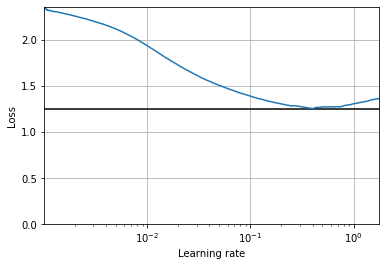

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

=> In general, the optimal learning rate is about half of the maximum learning rate, thats mean is, when learning rate did minimize loss function, half of this lr is the best. 

So in here, 10^-1= 3e-1 close to the best. I will use it.

Now, i will try 3e-1 learning rate and took if there is a different on test set or not. 

In [20]:
model=model_()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6838 - accuracy: 0.7449 - val_loss: 0.5725 - val_accuracy: 0.7909
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4727 - accuracy: 0.8285 - val_loss: 0.6079 - val_accuracy: 0.7731
Epoch 3/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4322 - accuracy: 0.8420 - val_loss: 0.4225 - val_accuracy: 0.8493
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4057 - accuracy: 0.8509 - val_loss: 0.4101 - val_accuracy: 0.8511
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3905 - accuracy: 0.8559 - val_loss: 0.4608 - val_accuracy: 0.8411
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3817 - accuracy: 0.8597 - val_loss: 0.4039 - val_accuracy: 0.8508
Epoch 7/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3700 - accuracy: 0.8640 - val_loss: 0.4203 - val_accuracy:

In [21]:
print_accuracy()

1500/1500 [==============================] - 1s 985us/step - loss: 0.2507 - accuracy: 0.9047
Train      [0.2506762146949768, 0.9046875238418579]
375/375 [==============================] - 0s 953us/step - loss: 0.4044 - accuracy: 0.8702
Validation [0.4043923020362854, 0.8701666593551636]
313/313 [==============================] - 1s 1ms/step - loss: 0.4255 - accuracy: 0.8658
Test       [0.42553281784057617, 0.8658000230789185]


we got less accuracy. Sometimes it could be. But this shouldnt may couse you give up from this tricks.

Now... Let's try other hyperparameter sets. We can do this in multiple ways. 

First: 

***GridSearchCV:*** This way does not make GPU acceleration. That's bad. 

***Hyperas:*** This way enable GPU acceleration. And enabling 10x fast and also easyer than GridSearch. 

I will apply GridSeachCV first, than apply Hyperas. 

In [23]:
import math

def build_model(n_hidden=10, n_neurons=30,learning_rate=3e-1, input_shape=X_train.shape[1:]):
    model = keras.models.Sequential() 
    model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))  #if we used inputLayer here instead Flatten, than we may have problem . Why? in the book .d
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=keras.optimizers.SGD(lr=learning_rate),
                  metrics=["accuracy"])
    return model

# mse_test = keras_reg.score(X_test, y_test)
# y_pred = keras_reg.predict(X_new)
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV


param_distribs = {
    "n_hidden": [3, 5, 7],
    "n_neurons": [10, 25, 50]
}

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])





rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=40,
                  validation_data=(X_valid, y_valid),
                  callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])


Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 1.6279 - accuracy: 0.3110 - val_loss: 1.3649 - val_accuracy: 0.4055
Epoch 2/40
1500/1500 [==============================] - 2s 2ms/step - loss: 2.0885 - accuracy: 0.1740 - val_loss: 2.3040 - val_accuracy: 0.1004
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3051 - accuracy: 0.0990 - val_loss: 2.3042 - val_accuracy: 0.1002
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3049 - accuracy: 0.0990 - val_loss: 2.3053 - val_accuracy: 0.1002
Epoch 5/40
1500/1500 [==============================] - 2s 2ms/step - loss: 2.3049 - accuracy: 0.0990 - val_loss: 2.3044 - val_accuracy: 0.1002
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3049 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.0966
Epoch 1/40
1000/1000 [==============================] - 3s 3ms/step - loss: 1.2372 - accuracy: 0.5286 - val_loss: 0.9557 - val_accuracy:

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000020AE0858F88>,
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'n_hidden': [3, 5, 7],
                                        'n_neurons': [10, 25, 50]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [24]:
rnd_search_cv.best_params_

{'n_neurons': 50, 'n_hidden': 5}

In [25]:
rnd_search_cv.best_score_

-0.4220743179321289

In [ ]:
### DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE ###
def model_():
    
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(50, activation="relu"),        
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(10, activation="softmax")#  If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid"
                                                    #  (i.e., logistic) activation function in the output layer instead of the "softmax"
                                                    #  activation function, and we would use the "binary_crossentropy" loss.      
    ])
model=model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

In [ ]:
model = keras.models.load_model("my_keras_model.h5")
model.evaluate(X_test, y_test) 
### DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE DENE ###


In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

In [26]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb,
                              tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss")]
                   )


1500/1500 [==============================] - 2s 2ms/step - loss: 0.2534 - accuracy: 0.9063 - val_loss: 0.4131 - val_accuracy: 0.8696


as we can see, our best hyperparameters is: ___{'n_neurons': 50, 'n_hidden': 5}___

So let's build last one model:

In [40]:
N_NEURONS= 50
N_HIDDEN= 5

model_manuelly=keras.models.Sequential()
model_manuelly.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
for layer in range(N_HIDDEN):
        model_manuelly.add(keras.layers.Dense(N_NEURONS, activation="relu"))
model_manuelly.add(keras.layers.Dense(10, activation="softmax"))
        
model_manuelly.compile(loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=3e-1),
    metrics=["accuracy"]) 

model_manuelly.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid),
    callbacks=[[tensorboard_cb], [keras.callbacks.EarlyStopping(patience=10)]])        


Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8478 - accuracy: 0.6711 - val_loss: 0.5931 - val_accuracy: 0.7509
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5444 - accuracy: 0.7997 - val_loss: 0.6320 - val_accuracy: 0.7769
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4836 - accuracy: 0.8271 - val_loss: 0.4721 - val_accuracy: 0.8335
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4444 - accuracy: 0.8380 - val_loss: 0.4302 - val_accuracy: 0.8501
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4236 - accuracy: 0.8479 - val_loss: 0.4567 - val_accuracy: 0.8402
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4129 - accuracy: 0.8497 - val_loss: 0.4494 - val_accuracy: 0.8380
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3967 - accuracy: 0.8556 - val_loss: 0.4572 - val_accuracy:

In [27]:
model = rnd_search_cv.best_estimator_.model


model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid),
             callbacks=[[tensorboard_cb], 
                        [keras.callbacks.EarlyStopping(patience=10)],
                       [keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)]])

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3712 - accuracy: 0.8657 - val_loss: 0.4244 - val_accuracy: 0.8474
Epoch 2/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3682 - accuracy: 0.8669 - val_loss: 0.4695 - val_accuracy: 0.8406
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3696 - accuracy: 0.8662 - val_loss: 0.4102 - val_accuracy: 0.8572
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8680 - val_loss: 0.4016 - val_accuracy: 0.8614
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3554 - accuracy: 0.8697 - val_loss: 0.4602 - val_accuracy: 0.8399
Epoch 6/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8710 - val_loss: 0.4078 - val_accuracy: 0.8557
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3507 - accuracy: 0.8730 - val_loss: 0.4162 - val_accuracy:

In [28]:
model = keras.models.load_model("my_keras_model.h5")

In [29]:
model.evaluate(X_test, y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8567


[0.41390350461006165, 0.8567000031471252]

Now lest's apply ***Hyperas***

need to download:

In [33]:
pip install hyperas

Note: you may need to restart the kernel to use updated packages.
